##  Logistic Regression Model

### Importing the required Libraries

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Reading the data 

In [39]:
df=pd.read_csv('HR_comma_sep.csv') # load the dataset using pandas

In [40]:
df.head(5) # inspect the top five row of the data set

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [41]:
df.shape # checks the numbe rof rows and column

(14999, 10)

The dataset contain 14999 rows and 10 columns

In [42]:
df.info() # check the dtat type of each column and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Cleaning The data 

In [43]:
df.isnull().sum()  # check the number of missing values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

They are no null value in the dataset

In [44]:
df.duplicated().sum() # check for duplicated rows

3008

They are 3008 duplicated rows

In [45]:
df = df.drop_duplicates() # Dropping duplicated rows

In [46]:
df.shape 

(11991, 10)

11991 rows and 10 columns left

**The dataset is relatively clean, They are no null_values and Datatype are in the right format**


In [47]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


0    10000
1     1991
Name: left, dtype: int64


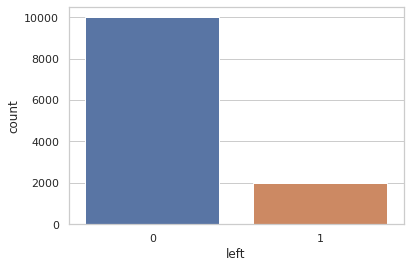

In [48]:
print(df['left'].value_counts())
sns.countplot(x='left', data=df) # visulalise the distribution of target column 
plt.show()

From the dataset 19991 personel left the company

In [49]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


Observations:

work statisfaction, time spent in the company, work accident and promotion within the the last five years seems to be a major factor while people quit they jobs 


We can calculate categorical means for other categorical variables such as Department and salary to get a more detailed sense of our data.

In [50]:
df.groupby('Department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
Department,,,,,,,,
IT,0.634016,0.715051,3.797131,200.638320,3.350410,0.142418,0.161885,0.002049
RandD,0.627176,0.712983,3.850144,201.291066,3.319885,0.171470,0.122478,0.030259
accounting,0.607939,0.721900,3.834138,200.877617,3.404187,0.140097,0.175523,0.016103
hr,0.621947,0.715691,3.675541,199.371048,3.256240,0.133111,0.188020,0.018303
management,0.631995,0.726307,3.837156,201.529817,3.981651,0.165138,0.119266,0.082569
marketing,0.634770,0.718440,3.720654,199.487370,3.421991,0.160475,0.166419,0.040119
product_mng,0.629825,0.713790,3.794461,198.893586,3.341108,0.158892,0.160350,0.000000
sales,0.631349,0.710398,3.777092,200.242050,3.380673,0.153751,0.169805,0.017907
support,0.634822,0.722998,3.820977,200.627128,3.292696,0.164195,0.171334,0.008786


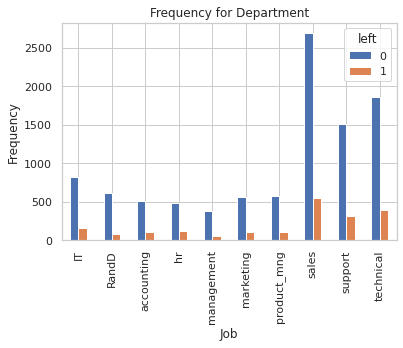

In [51]:
%matplotlib inline
df1=pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.title('Frequency for Department')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.savefig('Frequency for Department')


In [52]:
df.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.643343,0.706838,3.791919,200.067677,3.493939,0.157576,0.048485,0.044444
low,0.622655,0.718512,3.801742,200.439199,3.319686,0.154878,0.204530,0.006620
medium,0.634723,0.716539,3.806121,200.587341,3.389850,0.153013,0.146170,0.022999


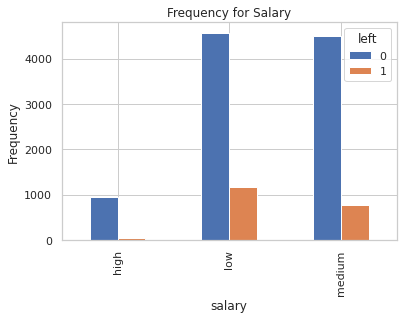

In [53]:
df1=pd.crosstab(df['salary'],df['left']).plot(kind='bar')
plt.title('Frequency for Salary')
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.savefig('Frequency for Department')

In [54]:
one_hot_enco = pd.get_dummies(df['salary'], prefix='salary_') #convert categorical data to numerical for ml
df1=df.join(one_hot_enco)
df=df1.drop(['salary'], axis = 1)

In [55]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary__high,salary__low,salary__medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1


In [56]:
one_hot_enco = pd.get_dummies(df['Department'], prefix='dept') #convert categorical data to numerical for ml
df1=df.join(one_hot_enco)
df=df1.drop(['Department'], axis = 1)

In [57]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary__high', 'salary__low',
       'salary__medium', 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_support', 'dept_technical'],
      dtype='object')

### Getting the data ready

In [58]:
X = df.drop(columns=['left']) # features
y = df['left'] # target

In [59]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select= None)
rfe = rfe.fit(X,y)

/home/suleiman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/suleiman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [61]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False  True  True  True  True  True  True False  True
 False False  True False False False False False]
[ 1  1  2 11  1  1  1  1  1  1  9  1 10  3  1  7  8  6  4  5]


In [62]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary__high', 'salary__low',
       'salary__medium', 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr',
       'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       'dept_support', 'dept_technical'],
      dtype='object')

In [63]:
cols=['satisfaction_level','last_evaluation','time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary__high', 'salary__low',
       'salary__medium','dept_RandD','dept_management']

In [64]:
X=df[cols] # new feature after feature selection using RFE
y=df['left'] #target

### Implementing the model

In [65]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.363640
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                11991
Model:                          Logit   Df Residuals:                    11981
Method:                           MLE   Df Model:                            9
Date:                Fri, 11 Feb 2022   Pseudo R-squ.:                  0.1911
Time:                        07:26:13   Log-Likelihood:                -4360.4
converged:                       True   LL-Null:                       -5390.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
satisfaction_level       -3.6483      0.112    -32.515      0.000      -3.868      -3.

The p-values for most of the variables are very small, therefore, most of them are significant to the model.


### Logistic Regression Model Fitting

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Predicting the test set results and caculating the accuracy

In [68]:
y_pred = model.predict(X_test)

In [69]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


### Cross Validation

In [70]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.837


### Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2908  124]
 [ 437  129]]


The result is telling us that we have 2908+129 correct predictions and 437+129 incorrect predictions.

### ROC Curvefrom sklearn import metrics

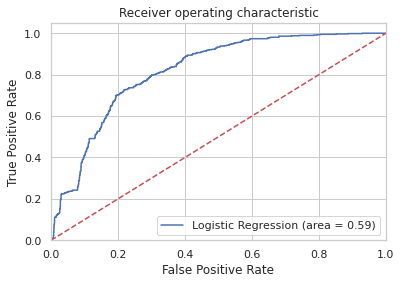

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
